In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#readind data files
#using encodig = "ISO- 8859-1" to avoid pandas error
rounds = pd.read_csv("rounds2.csv",encoding="ISO-8859-1")

In [3]:
#look at rounds data
print(rounds.head())

                     company_permalink  \
0                  /organization/-fame   
1               /ORGANIZATION/-QOUNTER   
2               /organization/-qounter   
3  /ORGANIZATION/-THE-ONE-OF-THEM-INC-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015         10000000.0  
1                  A  14-10-2014                NaN  
2                NaN  01-03-2014           700000.0  
3                  B  30-01-2014          3406878.0  
4                  A  19-03-2008      

In [4]:
#inspect the structure etc.
print(rounds.info(),"\n")
print(rounds.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
None 

(114949, 6)


The variables funding_round_code and raised_amount_usd contains some missing values as shown above.
We'll deal with them after we're done with understanding the data-column names,primary keys of the tables etc

In [5]:
#reading second file
companies = pd.read_csv("companies.txt",sep="\t",encoding="ISO-8859-1")

In [6]:
#look at companies head
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [7]:
#inspect the structure
print(companies.info(),"\n")
print(companies.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB
None 

(66368, 10)


Ideally ,the permalink column in the companies dataframe should be the unique_key of the table,having 66368 unique company names(links,or permalinks).Also these 66368 companies should be present in the rounds file

In [8]:
  #identify the unique numbers of permalinks in companies
len(companies['permalink'].unique())



66368

let's convert all the entries to lowercase (or uppercase) for uniformity

In [9]:
#converting all permalinks to lowercase
companies['permalink'] = companies['permalink'].str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [10]:
#look at unique values of permalink again in companies
len(companies.permalink.unique())

66368

In [11]:
#look at unique values of company_permalink in rounds
rounds["company_permalink"] = rounds["company_permalink"].str.lower()
len(rounds.company_permalink.unique())

66370

There seems to be extra permalinks in the rounds file which are not present in the companies file.Lets hope that this is a data quality issue,since if this were genuine,we have two companies whose investment round details are available but their metadata(company name,sector etc.) is not available in the companies table.

lets have a look at the company permalinks which are in the 'rounds' file but not in 'companies'

In [12]:
#companies present in rounds file but not in(-) companies file
rounds.loc[~rounds['company_permalink'].isin(companies['permalink'])]


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


 All the permalinks have weird and non-English characters.Let's see whether these characters are present in the original data frame as well

In [13]:
#looking at the indecis with weird characters
rounds_original = pd.read_csv('rounds2.csv',encoding="ISO-8859-1")
rounds_original.iloc[[29597,31863,45176,58473,101036,109969,113839],:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


Thus,this is most likely a data quality issue we have introduced while reading the data file into python.Specifically ,this is most likely caused because of encoding.

First let's try to figure out the encoding type of this file.Then we can try specifying the encoding type at the time of reading the file.The chardet library shows the encoding type of a file.

In [14]:
#import chardet
#rawdata = open('rounds2.csv','rb').read()
#result = chardet.detect(rawdata)
#charenc = result['encoding']
#print(charenc,'\n')
#print(result)
#this method didn't work out

In [15]:
rounds['company_permalink'] = rounds.company_permalink.str.encode('utf-8').str.decode('ascii','ignore')
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']),:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
...,...,...,...,...,...,...
110545,/organization/whodats-spaces,/funding-round/d5d6db3d1e6c54d71a63b3aa0c9278e6,seed,NaN,28-10-2014,30000.0
113839,/organization/zengame-,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


This seems to work fine.
let's now look at the number values in rounds dataframe again


In [16]:
#look at unique values again
len(rounds.company_permalink.unique())

66368

Now it makes sense -there are 66368 unique companies in both the rounds and companies dataframes.

It is possible that a similar encoding problems are present in the companies file as well.Lets look at the companies which are present in the companies file but not in the rounds file-if these have special characters,then it is most likely because the companies file is encoded(while round is not) 

In [17]:
#companies present in companies df but not in rounds df
companies.loc[~companies['permalink'].isin(rounds['company_permalink']),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10â°north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-æ å¿§ææ¿,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinkedâ¢,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everythingâ®-social-ne...,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attachã©-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
...,...,...,...,...,...,...,...,...,...,...
63833,/organization/whodatâs-spaces,Whodatâs Spaces,NaN,Apps,operating,NaN,NaN,NaN,NaN,NaN
65778,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010
66365,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [18]:
#removing encoding from companies df
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii','ignore')


In [19]:
companies.loc[~companies['permalink'].isin(rounds['company_permalink']),:]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


Thus ,the encoding issue seems resolved now.Lets write these (clean) dataframes into separated files so we don't have to worry about encoding problems again files so we 

In [20]:
#write rounds file
rounds.to_csv('rounds_clean.csv',sep=',',index=False)

#write companies file
companies.to_csv("companies_clean.csv",sep=',',index=False)

# Data Cleaning
Now that we've treated the encoding problems(caused by special characters),let's complete the data cleaning process by treating missing values.

we'll read the clean csv files we created 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#read the new,decoded csv files
rounds = pd.read_csv("rounds_clean.csv")
companies = pd.read_csv("companies_clean.csv")

display('Rounds',rounds)
display('Companies',companies)

'Rounds'

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


'Companies'

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/eron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/asys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [22]:
#quickly verify that there are 66368 unique companies in both 
#and that only the same 66368 are present in both files
#unique values
print(len(rounds.company_permalink.unique()))
print(len(companies.permalink.unique()))
#present in rounds but not in companies
print(len(rounds.loc[~rounds['company_permalink'].isin(companies['permalink']),:]))


66368
66368
0


# Missing Value Treatment

Let's now move to missing value treatement.
Let's have a look at the missing values in both the dataframes

In [23]:
#missing values in companies df
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [24]:
#missing values in rounds df
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

Since there are no missing values in the permalink or company_permalink columns,let's merge the two and then work on the master dataframe

In [25]:
#master = pd.concat([companies,rounds],axis=1)
master = pd.merge(companies,rounds,how='inner',left_on="permalink",right_on="company_permalink")

In [26]:
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Since the columns company_permalink and permalink are the same, lets remove one of them

In [27]:
#print column names
master.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [28]:
#removing redundant columns
master = master.drop(['company_permalink'],axis=1)
master

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [29]:
#look at columns after dropping
master.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

Let's now look at the number of missing values in the master df

In [30]:
#columns-wise missing values
master.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

Let's look at the fraction of missing values in the columns

In [31]:
#summing up the missing values (column-wise) and displaying fraction of NaNs
round(master.isnull().sum()/len(master.index)*100,2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Clearly,the column funding_round is useless(with about 73% missing values).Also, for business objectives given,the columns homepage_url,founded_at,state_code,region and city need not be used.
Thus,let's drop these columns

In [32]:
master.drop(['funding_round_code','homepage_url','founded_at','state_code','region','city'],axis=1,inplace=True)

In [33]:
master.columns

Index(['permalink', 'name', 'category_list', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd'],
      dtype='object')

In [34]:
#summing up the missing values (column-wise) and displaying fraction of NaNs
round(master.isnull().sum()/len(master.index)*100,2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Note that the column raised_amount_usd is an important column,since that is the number we want to analyse(compare,means,sum etc.) That needs to be carefully treadted.


Also,the column country_code will be used for country-wise analysis,and category_list will be used to merge the dataframe with the main categories.




Let's first see how we can deal with missing values in raised_amount_usd

In [35]:
#summary stats of raised_amount_usd
master['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

The mean is somewhere around USD 10 million, while the median is only about USD 1m.The min and max value are also miles apart.

In general,since there is a huge spread in the funding amounts,it will be inappropriate to impute it with a metric such as median or mean.Also, since we have quite a large number of observations,it is wiser to just drop the rows

let's thus remove the rows having NaNs in raised_amount_usd.

In [36]:
 #removing NaNs(empty rows) in raised_amount_usd
#master = master[~np.isnull(master['raised_amount_usd'])]
master.dropna(subset=['raised_amount_usd'],inplace=True)

In [37]:
#checking the null values 
round(master.isnull().sum()/len(master.index)*100,2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Let's now look at the column country_code.To see the distribution of the values for categorical variables,it is best to convert them into "category"

In [38]:
country_codes = master['country_code'].astype('category')
#displaying frequencies of each category
country_codes.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
       ...  
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 134, dtype: int64

By far,the most number of investment have happened in American countries.We can also see the fractions

In [39]:
#viewing fraction of the counts of country_codes
country_codes.value_counts()/len(master.index)*100

USA    65.342937
GBR     5.285439
CAN     2.754873
CHN     2.029297
IND     1.736539
         ...    
HND     0.001053
GRD     0.001053
GGY     0.001053
DZA     0.001053
KNA     0.001053
Name: country_code, Length: 134, dtype: float64

Now, we can either delete the rows having country_code missing(about 6% rows),or we can impute them by USA.
Since the number 6 is quite small,and we have a decent amount of data,it may be better to just remove the rows.

np.isnan() does not work with array of type 'object',it only works with native numpy type(float).Thus, we are usning pd.isnull( instead)

In [40]:
#removing rows with missing country_codes
#master = master[~pd.isnull(master['country_code'])]
master.dropna(subset=['country_code'],inplace=True)

In [41]:
#looking at missing values
round(master.isnull().sum()/len(master.index)*100,2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Note that the fraction of missing values in the remaining dataframe has also reduced now-only 0.65% in category_list.Let's thus remove those as well.

Optionally ,we could have simply let the missing values in the dataset and continued the analysis.There is nothing wrong with that.But in this case,since we will use that column later for merging with the 'main_categories,removing the missing values will be quite convenient(and again -we have enough data)

In [42]:
#removing the rows with missing category_list values
#master = master[~pd.isnull(master['category_list'])]
master.dropna(subset=['category_list'],inplace=True)

In [43]:
#looking at missing values
round(master.isnull().sum()/len(master.index),2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [44]:
#writing the clean dataframe to an another file
master.to_csv('master_df.csv',sep=',',index=False)

In [45]:
#look at the master df for number of rows etc.
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                88529 non-null  object 
 1   name                     88528 non-null  object 
 2   category_list            88529 non-null  object 
 3   status                   88529 non-null  object 
 4   country_code             88529 non-null  object 
 5   funding_round_permalink  88529 non-null  object 
 6   funding_round_type       88529 non-null  object 
 7   funded_at                88529 non-null  object 
 8   raised_amount_usd        88529 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [46]:
#after missing value treatement ,approx 77% observations are retained
len(master.index)/len(rounds.index)*100

77.01589400516751

# Funding Type Analysis


Let's compare the funding amounts across the funding types.Also, we need to impose the constrain that the investment amount should be between 5 and 15 million USD.We will choose the funding type such that the average investment amount falls in this range

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('master_df.csv')
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [48]:
#first,let's filter the df so it only contains the four specified funding types
df = df[( df.funding_round_type == "venture")  |
       (df.funding_round_type == "angel")  |
       (df.funding_round_type ==  "seed")  |
       (df.funding_round_type == "private_equity")]

Now,we have to compute a **representative value of the funding amount** for each type of investment.We can either choose the mean or the median -let's have a look at the distribution of raised_amount_usd to get a sense of the distribution of data.

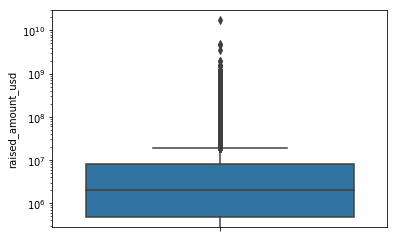

In [49]:
#distribution of raised_amount_usd
sns.boxplot(y=df['raised_amount_usd'])
plt.yscale('log')
plt.show()


Let's also look at the summary metrics

In [50]:
#summary metrics
df['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

Note that there is a significant difference between the mean and median -USD 9.5m and USD 2m.Let's also compare the summary stats scross the four categories.

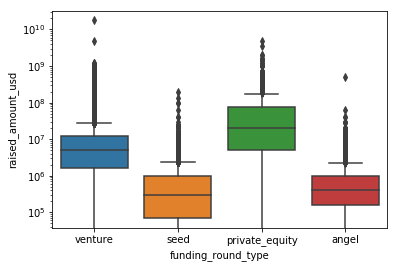

In [51]:
#compare the summary stats across four categories
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=df)
plt.yscale('log')
plt.show()

In [52]:
#compare the mean and median values across categories
df.pivot_table(values='raised_amount_usd',columns='funding_round_type',aggfunc=[np.median,np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07

Note that there's a large difference between the mean and median values for all four types.For e.g. the median is about 20m while the mean is about 70m.

Thus, the choice of the summary statistic will drastically affect the decision (of the investment type).let's choose median,since there are quite a few extreme values pulling the mean up towards them - but they are not the most 'representative' values.

In [53]:
#compare the median investment amount across the types
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

The median amount for type 'private_equity' is approx. USD 20m,which is beyond Techlov's range of 5-15m.The median of 'venture' type is about USD 5m, which is suitable for them.The average amounts of angel and seed types are lower than their range..

Thus,'venture' type investment will be most suitable to them.

# Country Analysis

Let's now compare the total investment amounts across countries.Note that we'll filter the data for only 'venture' type investment and then compare the 'total investment' across countries.

In [54]:
#filter the df for private equity type investments
df = df[df.funding_round_type == 'venture']
#group by country codes and compare the total funding amounts
country_wise_total =df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending =False)
print(country_wise_total)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
           ...     
MCO    6.570000e+05
SAU    5.000000e+05
CMR    3.595610e+05
GTM    3.000000e+05
MMR    2.000000e+05
Name: raised_amount_usd, Length: 97, dtype: float64


Let's now extract the top 9 countries from country_wise_total

In [55]:
#top 9 countries
top_9_countries = country_wise_total[:9]
top_9_countries

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

 Among the top 9 countries USA,GBR and IND are the top three English speaking countries.Let's filter the dataframe so it contains only the top 3 countries.

In [56]:
#filtering  for the top three countries
df = df[(df.country_code == 'USA') |
       (df.country_code == "GBR")  |
       (df.country_code == 'IND')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


After filtering for 'venture' investments and the three countries USA,Great Britain and India,the filtered df looks like this.

In [57]:
#filtered df has about 38800 observations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 88518
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38803 non-null  object 
 1   name                     38803 non-null  object 
 2   category_list            38803 non-null  object 
 3   status                   38803 non-null  object 
 4   country_code             38803 non-null  object 
 5   funding_round_permalink  38803 non-null  object 
 6   funding_round_type       38803 non-null  object 
 7   funded_at                38803 non-null  object 
 8   raised_amount_usd        38803 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


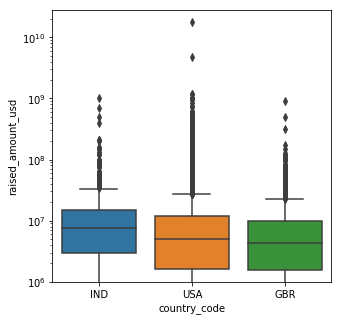

In [58]:
#boxplot to see distribution of funding amount across countries
plt.figure(figsize=(5,5))
sns.boxplot(x='country_code',y='raised_amount_usd',data=df)
plt.yscale('log')
plt.show()

Now, we have shortlisted the investment type (venture) and the three countries.Let's now choose the sectors

# Sector Analysis

First, we need to extract the main sector using the column category_list.The category_list column contains values such as 'Biotechnology|Health Care' -in this 'Biotechnology' is the 'main category' of the company,which we need to use.


let's extract the main categories in the new column.

In [59]:
#extracting the main category
df['main_category'] = df['category_list'].apply(lambda x:x.split('|')[0])
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


We can now drop the category_list column.

In [60]:
#drop the category_list column
df = df.drop('category_list',axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


Now, we'll read the mapping.csv file and merge the main categories with its corresponding column.

In [61]:
#read mapping file
mapping = pd.read_csv("mapping.csv",sep=",")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Firstly,let's get rid of the missing values since we'll not be able to merge those rows anyway.

In [62]:
#missing values in mapping file
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [63]:
#remove the row with missing values
#mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.dropna(inplace=True)
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

Now,since we need to merge the mapping file with the main dataframe(df),let's convert the column to lowercase in both.

In [64]:
#converting common columns to lowercase
mapping['category_list'] = mapping['category_list'].str.lower()
df['main_category'] =df['main_category'].str.lower()

In [65]:
#look at heads
print(mapping.head())

      category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
1                3d                    0       0                           0   
2       3d printing                    0       0                           0   
3     3d technology                    0       0                           0   
4        accounting                    0       0                           0   
5  active lifestyle                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
1              0       0              1                           0       0   
2              0       0              1                           0       0   
3              0       0              1                           0       0   
4              0       0              0                           0       0   
5              0       1              0                           0       0   

   Social, Finance, Analytics, Advertising  

In [66]:
print(df)

                        permalink          name     status country_code  \
0             /organization/-fame         #fame  operating          IND   
7            /organization/0xdata        H2O.ai  operating          USA   
8            /organization/0xdata        H2O.ai  operating          USA   
9            /organization/0xdata        H2O.ai  operating          USA   
15     /organization/1-mainstream  1 Mainstream   acquired          USA   
...                           ...           ...        ...          ...   
88503    /organization/zyomyx-inc        ZYOMYX  operating          USA   
88505    /organization/zyomyx-inc        ZYOMYX  operating          USA   
88506    /organization/zyomyx-inc        ZYOMYX  operating          USA   
88516         /organization/zyrra         Zyrra  operating          USA   
88518        /organization/zystor        Zystor   acquired          USA   

                               funding_round_permalink funding_round_type  \
0      /funding-round/

Let's have a look at the category_list column of the mapping file.These values will be used to merge with the main df.

In [67]:
mapping['category_list']


1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object

To be able to merge all the main_category values with the mapping file's category_list column,all the values in th  main_category column should be present in the category_list column of the mappng file.

Let's see this is true.

In [68]:
#values in main_category column of df which are not in the category_list column of mapping file
df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
47,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
136,/organization/1world-online,1World Online,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
...,...,...,...,...,...,...,...,...,...
88270,/organization/zoopla,Zoopla,ipo,GBR,/funding-round/98da1f441a55c9a9629a256828923e38,venture,19-01-2009,5440000.0,property management
88291,/organization/zopa,Zopa,operating,GBR,/funding-round/2a55d435c3433d8f903526c050c19361,venture,20-03-2007,12900000.0,finance
88292,/organization/zopa,Zopa,operating,GBR,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.0,finance
88293,/organization/zopa,Zopa,operating,GBR,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,01-07-2006,5000000.0,finance


Notice that values such as 'analytics','business analytics','finance','nanotechnology' etc. are present in the mapping file.

Let's have a look at the values which are present in the mapping file but not in the main dataframe df.

In [69]:
#value in the category_list column which are not in main_category column
mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
670,virtual workforces,0,0,0,1,0,0,0,0,0
672,waste ma0gement,0,0,1,0,0,0,0,0,0
682,weddings,0,0,0,1,0,0,0,0,0
683,wholesale,0,0,0,0,0,0,0,1,0


If you see carefully you'll notice something fishy - there are sectors named alter0tive medicine,a0lytics,waste ma0gement,veteri0ry,etc.This is not a random quality issue,but rather a pattern.In some strings the 'na' has been replaced by '0'.This is weird - may be someone was trying to replace the 'NA' values with '0 and ended up doing this.

Let's treat this problem by replacing '0' with 'na' in the category_list column.

In [70]:
#replacing '0' with 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0','na'))
print(mapping['category_list'])

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
683           wholesale
684    wine and spirits
685            wireless
686               women
687        young adults
Name: category_list, Length: 687, dtype: object


This looks fine now.Let's merge the two dataframes

In [71]:
#merge the dfs
df = pd.merge(df,mapping,how ='inner',left_on='main_category',right_on='category_list')
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,0,0,0,1,0,0,0,0,0


In [72]:
#let's drop the category_list column since it is the same as main_category
df=df.drop('category_list',axis=1)
df.head()


,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,0,0,0,1,0,0,0,0,0


In [73]:
#look at columns type and names
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   permalink                                38788 non-null  object 
 1   name                                     38788 non-null  object 
 2   status                                   38788 non-null  object 
 3   country_code                             38788 non-null  object 
 4   funding_round_permalink                  38788 non-null  object 
 5   funding_round_type                       38788 non-null  object 
 6   funded_at                                38788 non-null  object 
 7   raised_amount_usd                        38788 non-null  float64
 8   main_category                            38788 non-null  object 
 9   Automotive & Sports                      38788 non-null  int64  
 10  Blanks                                   38788

**Converting the 'wide' dataframe to 'long'**

you'll notice that the columns representing the main category in the mapping file are originally in the 'wide' format- Automotive & Sports, Cleantech/Semiconductors etc.

They contain the value '1' if the company belongs to that category,else 0.This is quite redundant.We can as well have a column named 'sub-category' having these values. 

In [74]:
#store the value and id variables in tw0 separate arays
#store the value variables in one series
value_vars = df.columns[9:18]

#take the setdiff() to get the rest of the variables
id_vars = np.setdiff1d(df.columns,value_vars)

print(value_vars,"\n")
print(id_vars)

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object') 

['country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'main_category' 'name' 'permalink' 'raised_amount_usd' 'status']


In [75]:
#conver into long
long_df = pd.melt(df,
                 id_vars=list(id_vars),
                 value_vars=list(value_vars))
long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,media,#fame,/organization/-fame,10000000.0,operating,Automotive & Sports,0
1,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,media,90min,/organization/90min,15000000.0,operating,Automotive & Sports,0
2,GBR,07-05-2013,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,media,90min,/organization/90min,5800000.0,operating,Automotive & Sports,0
3,GBR,26-03-2014,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,media,90min,/organization/90min,18000000.0,operating,Automotive & Sports,0
4,USA,06-08-2014,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,media,All Def Digital,/organization/all-def-digital,5000000.0,operating,Automotive & Sports,0


  We can now get rid of the rows where the column 'value' is 0 and then remove that column altogether

In [76]:
#remove rows having value 0
long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value',axis=1)

In [77]:
#look at the new df
long_df.head()
len(long_df)

38788

In [78]:
#renaming the 'variable' column
long_df = long_df.rename(columns={'variable':'sector'})

In [79]:
#info
long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 25828 to 349075
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country_code             38788 non-null  object 
 1   funded_at                38788 non-null  object 
 2   funding_round_permalink  38788 non-null  object 
 3   funding_round_type       38788 non-null  object 
 4   main_category            38788 non-null  object 
 5   name                     38788 non-null  object 
 6   permalink                38788 non-null  object 
 7   raised_amount_usd        38788 non-null  float64
 8   status                   38788 non-null  object 
 9   sector                   38788 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


The dataframe now contains only venture type investments in countries USA,IND and GBR, and we have mapped each company to one of the eight main sectors(named 'sector' in the dataframe).

We can now compute the sector-wise number and the amount of investment in the three countries.

In [80]:
#summarising the sector-wise number and sum of investments across three countries
#first,let's also filter for investment range between 5 and 15m
df = long_df[(long_df['raised_amount_usd'] >=5000000) & (long_df['raised_amount_usd'])<=15000000]

In [81]:
#groupby country,sector and compute the counts and sum
df.groupby(['country_code','sector']).raised_amount_usd.agg(['count','sum'])

count           sum
country_code sector                                                      
GBR          Automotive & Sports                         44  4.808787e+08
             Cleantech / Semiconductors                 442  5.073290e+09
             Entertainment                              136  1.162565e+09
             Health                                     118  1.046655e+09
             Manufacturing                              122  1.019283e+09
             News, Search and Messaging                 241  2.956024e+09
             Others                                     516  4.492220e+09
             Social, Finance, Analytics, Advertising    421  3.773329e+09
IND          Automotive & Sports                         31  1.556350e+09
             Cleantech / Semiconductors                  54  7.864446e+08
             Entertainment                               76  9.761918e+08
             Health                                      42  5.643700e+08
             Manufacturing                               55  7.302600e+08
             News, Search and Messaging                 130  1.739580e+09
             Others                                     284  6.329507e+09
             Social, Finance, Analytics, Advertising    147  1.578805e+09
USA          Automotive & Sports                        505  1.163216e+10
             Cleantech / Semiconductors                7996  1.199319e+11
             Entertainment                             1794  1.701456e+10
             Health                                    3269  3.167506e+10
             Manufacturing                             2453  2.484532e+10
             News, Search and Messaging                4356  4.560052e+10
             Others                                    8310  8.279682e+10
             Social, Finance, Analytics, Advertising   7246  8.633140e+10

C:\Users\rahul\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


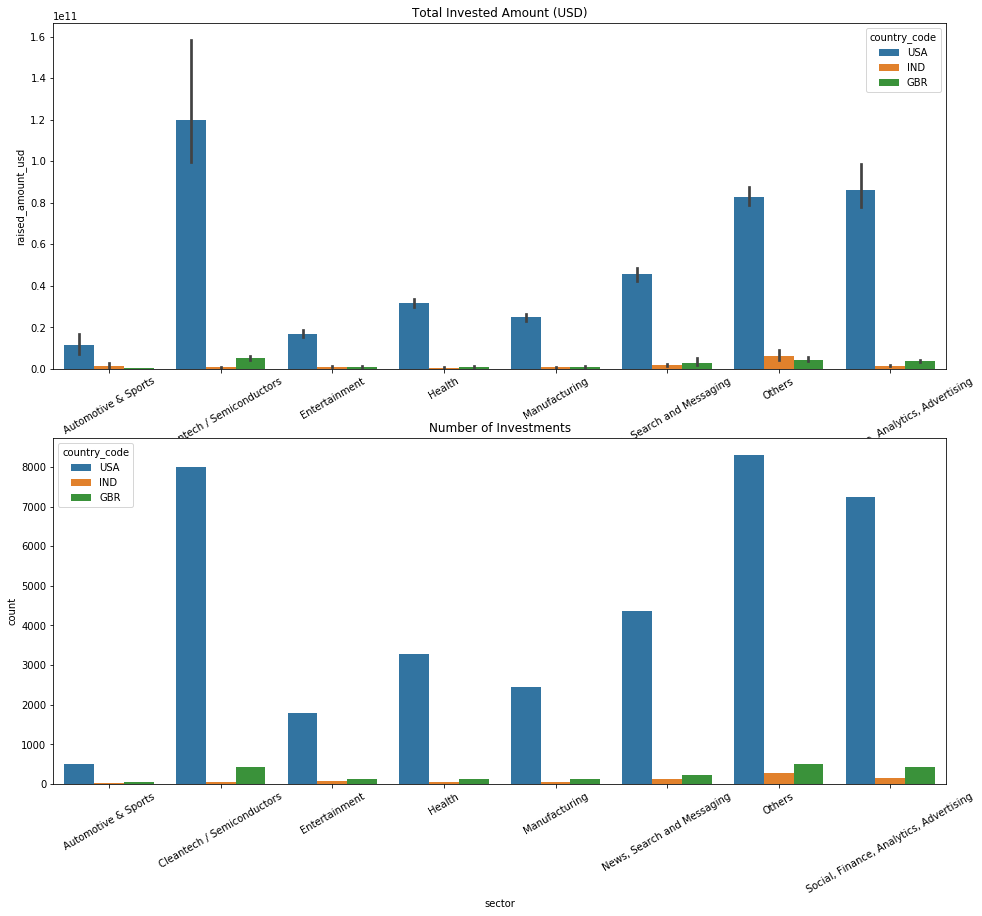

In [82]:
#Plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16,14))

plt.subplot(2,1,1)
p = sns.barplot(x='sector',y='raised_amount_usd',hue='country_code',data=df,estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')


plt.subplot(2,1,2)
q= sns.countplot(x='sector',hue='country_code',data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')

plt.show()

Thus,the top country in terms of the numbers of investments and the total amount invested in the USA.The sectors 'Other','Social,Finance,Analytics and Advertising' and 'Cleantech/Semiconductors' are the most heavily invested ones.

In case you don't want to consider 'Other as sector','News,Search and Messaging' is the next best sector.